La idea de este informe es analizar las distintas variables que hacen a la calidad de vida, detectar si alguna de esas variables son dependientes y, finalmente, identificar los países con mejor calidad de vida.

IMPORTACIÓN DE LIBRERÍAS

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

ACCESO AL DATASET A TRAVÉS DE API DE KAGGLE

In [3]:
import kagglehub
import os

path = kagglehub.dataset_download("ahmedmohamed2003/quality-of-life-for-each-country")

print("Path to dataset files:", path)
file_path = os.path.join(path, 'Quality_of_Life.csv')

# Chequear si el archivo existe e imprimir primeras cinco entradas
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(df.head())
else:
    print(f"Error: File not found at {file_path}")

100%|██████████| 9.19k/9.19k [00:00<00:00, 9.36MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ahmedmohamed2003/quality-of-life-for-each-country/versions/1
         country  Purchasing Power Value Purchasing Power Category  \
0    Afghanistan                   32.15                'Very Low'   
1  Aland Islands                  125.01               'Very High'   
2        Albania                   42.82                     'Low'   
3       Alderney                    0.00                       NaN   
4        Algeria                   27.60                'Very Low'   

   Safety Value Safety Category  Health Care Value Health Care Category  \
0         25.33           'Low'              24.24                'Low'   
1         71.81          'High'              79.72               'High'   
2         55.52      'Moderate'              48.21           'Moderate'   
3         83.79     'Very High'             100.00          'Very High'   
4         47.54      'Moderate'              54.43           'Modera

EXPLORACIÓN ANALÍTICA DE DATOS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            236 non-null    object 
 1   Purchasing Power Value             236 non-null    float64
 2   Purchasing Power Category          190 non-null    object 
 3   Safety Value                       236 non-null    float64
 4   Safety Category                    234 non-null    object 
 5   Health Care Value                  236 non-null    float64
 6   Health Care Category               221 non-null    object 
 7   Climate Value                      236 non-null    float64
 8   Climate Category                   114 non-null    object 
 9   Cost of Living Value               236 non-null    float64
 10  Cost of Living Category            191 non-null    object 
 11  Property Price to Income Value     236 non-null    object 

VALORES NULOS

<Axes: >

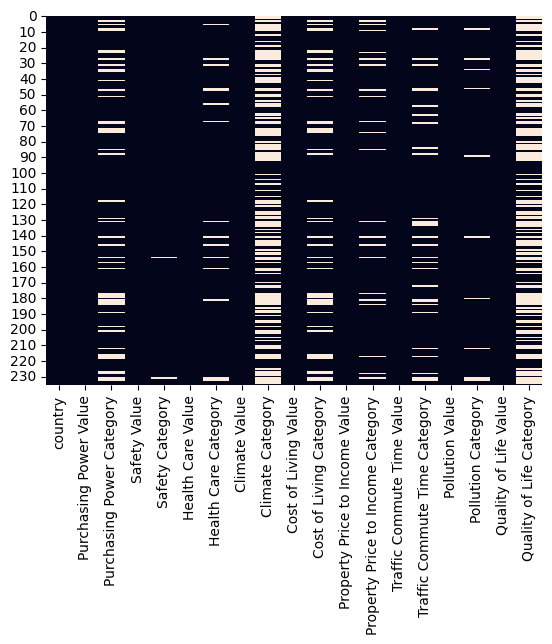

In [5]:
valores_nulos = df.isnull()

# se imprime la suma de valores nulos de cada columna
df.isnull().sum()

# se grafica con un mapa de calor de seaborn
sns.heatmap(df.isnull(), cbar=False)

Se ve que la mayoría de los países no tienen clasificación climática ni de calidad de vida, por lo que no vamos a tener en cuenta dichas columnas para el análisis.

A su vez, queremos llegar a una conclusión propia basada en los diferentes items, por lo que también dejaremos de lado el valor de calidad de vida.

In [6]:
database = df.drop(columns=['Climate Category', 'Quality of Life Value', 'Quality of Life Category'])
#se imprimen los treinta primeros registros como prueba de la eliminación de las columnas
database.head(30)

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High'
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low'
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low'
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High'
5,American Samoa,0.00,NaN,54.41,'Moderate',0.00,NaN,0.00,0.00,NaN,0.0,NaN,100.00,'Very High',78.45,'High'
6,Andorra,121.14,'Very High',84.71,'Very High',75.56,'High',0.00,48.09,'Low',9.03,'Moderate',13.33,'Very Low',22.98,'Low'
7,Angola,224.46,'Very High',33.71,'Low',36.58,'Low',0.00,42.57,'Low',8.01,'Moderate',65.43,'Very High',92.07,'Very High'
8,Anguilla,0.00,NaN,75.44,'High',77.08,'High',0.00,0.00,NaN,1.8399999999999999,'Very Low',0.00,NaN,0.00,NaN
9,Antigua And Barbuda,0.00,NaN,42.86,'Moderate',30.56,'Low',0.00,0.00,NaN,0.0,NaN,35.00,'Moderate',43.10,'Moderate'


Con esto, notamos que un gran porcentaje de los países no tienen información de valores climáticos (están en 0.00), pero por ahora dejaremos la columna al ser un importante indicador en nuestra búsqueda.

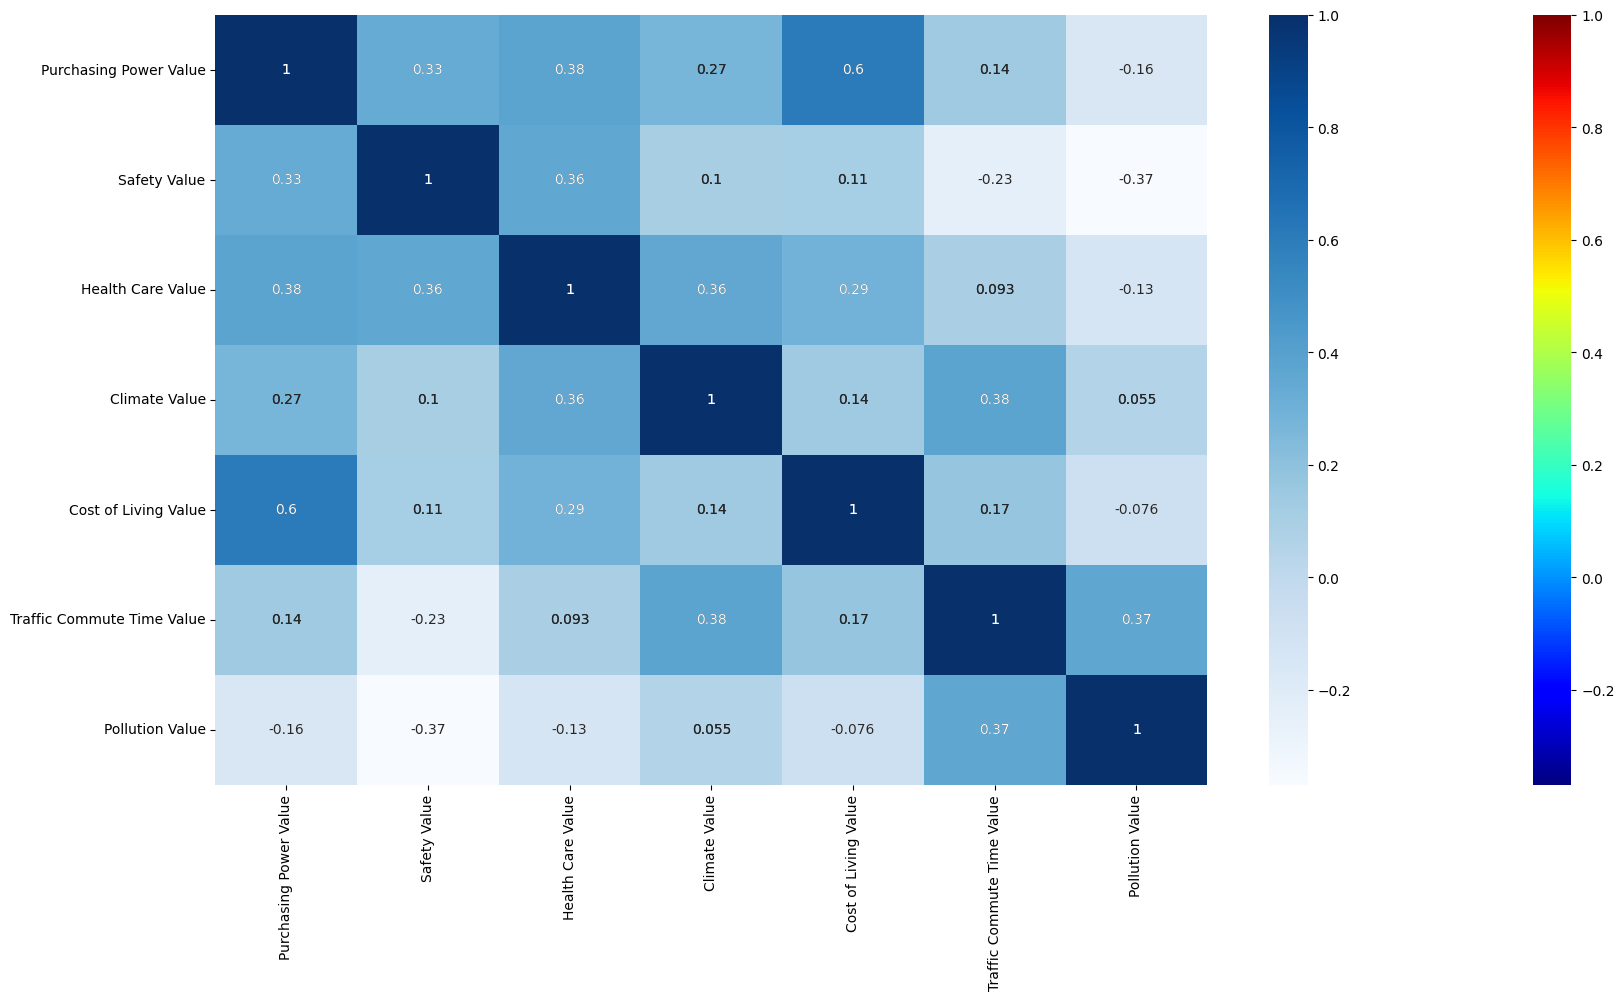

In [7]:
plt.figure(figsize=(20, 10))
life_corr = database.corr(numeric_only=True)
sns.heatmap(life_corr,
            xticklabels = life_corr.columns.values,
            yticklabels = life_corr.columns.values,
            annot = True,cmap='jet');
corr = database.corr(numeric_only=True)
chart = sns.heatmap(corr, annot = True, cmap='Blues')

Aquí vemos que las variables más relacionadas son el coste de vida ('Cost of Living Value') y el poder adquisitivo ('Purchasing Power Value'), por lo que procederemos a hacer un análisis bivariado de las mismas.

Coefficients: 
 [1.20799556]
Independent term: 
 10.241684975338572
Mean squared error: 1709.11
Variance score: 0.37


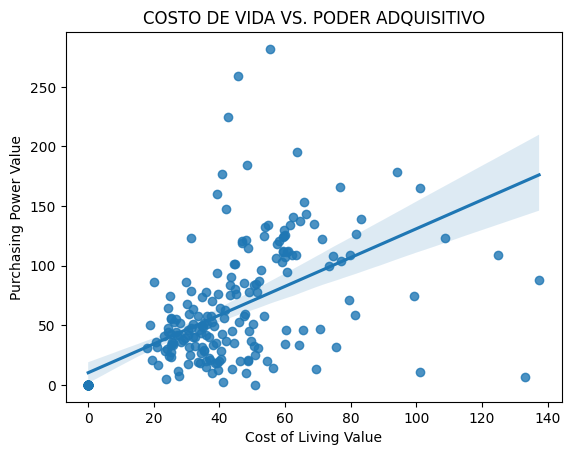

In [29]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#se utilizará un modelo de regresión lineal y un diagrama de dispersión (scatter plot)

X_train = database[['Cost of Living Value']]
y_train = database['Purchasing Power Value'].values

regr = linear_model.LinearRegression()

modelo= regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))


sns.regplot(x=database['Cost of Living Value'], y=database['Purchasing Power Value'])
plt.title('COSTO DE VIDA VS. PODER ADQUISITIVO')
plt.savefig('costo_de_vida_vs_poder_adquisitivo.png', transparent=True)
plt.show()

Observamos que el costo de vida y el poder adquisitivo son concordantes en los países en los que ambos índices son bajos. Luego, las variables se dispersan más entre sí.

**Paises con alto nivel de seguridad, alto poder adquisitivo y buen sistema de salud**

In [9]:
#calculamos la media de las variables de seguridad 'Safety Value' y del sistema de salud 'Health Care Value'
print(database['Safety Value'].mean())
print(database['Health Care Value'].mean())



55.274449152542374
54.73156779661018


In [10]:
#filtramos el dataset por los países que superen la media de las variables que calculamos antes, que sean de muy alto poder adquisitivo ('Purchasing Power Category -> Very High') y las ordenamos por el coste de vida ('Cost of Living Value') en forma ascendente
db_filtrada = database[(database['Purchasing Power Category'].str.contains('Very High', na=False)) & (database['Safety Value'] > 55.274449152542374) & (database['Health Care Value'] > 54.73156779661018) ]
print(db_filtrada[['country','Safety Value','Health Care Value','Cost of Living Value']].sort_values(by='Cost of Living Value', ascending=True))

                  country  Safety Value  Health Care Value  \
159                  Oman         81.94              65.11   
113                Kuwait         67.19              57.93   
185          Saudi Arabia         76.23              61.71   
32                 Brunei         70.70              75.37   
106                 Japan         77.07              79.81   
6                 Andorra         84.71              75.56   
171                 Qatar         84.05              73.45   
17                Bahrain         75.28              66.60   
1           Aland Islands         71.81              79.72   
221  United Arab Emirates         84.43              70.63   
111              Kiribati         81.86              55.56   
84             Guadeloupe         72.18              93.06   
78                Germany         60.77              71.97   
70                Finland         73.57              77.57   
148           Netherlands         73.36              79.47   
101     

Llegamos a la conclusión de que estos 24 países o territorios cumplen con los filtros que seleccionamos, siendo los que tienen un mejor balance en costo de vida, seguridad y sistema de salud.

**PAÍSES MÁS SEGUROS**

In [11]:
db_seguros = db_filtrada.nlargest(n=5, columns=['Safety Value'])[['country', 'Safety Value']]

print(db_seguros)


                  country  Safety Value
121         Liechtenstein         87.84
6                 Andorra         84.71
221  United Arab Emirates         84.43
171                 Qatar         84.05
159                  Oman         81.94


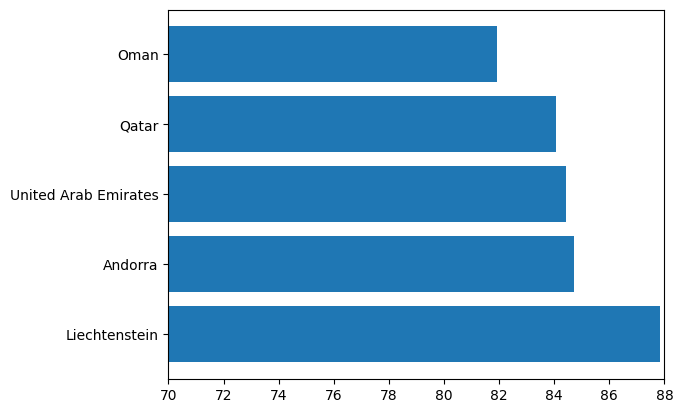

In [12]:
import matplotlib.pyplot as plt

x = db_seguros['Safety Value'].tolist()
y = db_seguros['country'].tolist()

fig, ax = plt.subplots()
ax.barh(y, x)
plt.xlim(70, 88)
plt.show()


**PAÍSES CON MEJOR ATENCIÓN MÉDICA**

In [13]:
db_salud = db_filtrada.nlargest(n=5, columns=['Health Care Value'])[['country', 'Health Care Value']]

print(db_salud)


           country  Health Care Value
84      Guadeloupe              93.06
106          Japan              79.81
1    Aland Islands              79.72
148    Netherlands              79.47
55         Denmark              78.50


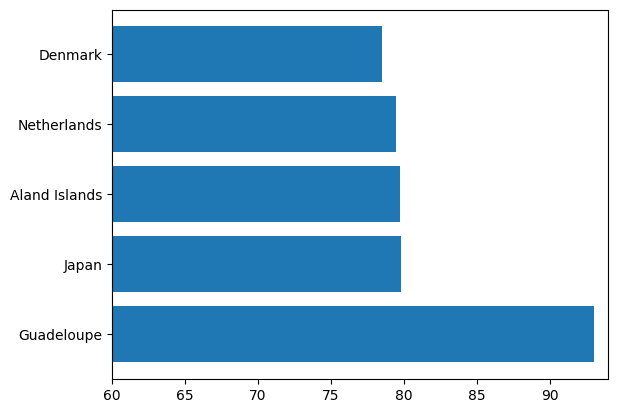

In [14]:
import matplotlib.pyplot as plt

x = db_salud['Health Care Value'].tolist()
y = db_salud['country'].tolist()

fig, ax = plt.subplots()
ax.barh(y, x)
plt.xlim(60, 94)
plt.show()

**PAÍSES CON MENOR COSTO DE VIDA**

In [15]:
db_filtrada.nsmallest(n=5, columns=['Cost of Living Value'])[['country', 'Cost of Living Value']]


,country,Cost of Living Value
159,Oman,39.30
113,Kuwait,40.82
185,Saudi Arabia,42.06
32,Brunei,46.73
106,Japan,46.99


**PAÍSES CON MENOR ÍNDICE DE POLUCIÓN**

In [16]:
db_filtrada.nsmallest(n=5, columns=['Pollution Value'])[['country', 'Pollution Value']]


,country,Pollution Value
121,Liechtenstein,6.47
87,Guernsey,11.49
70,Finland,11.83
95,Iceland,15.84
1,Aland Islands,18.05


**PAÍSES CON MEJOR RELACIÓN PRECIO DE VIVIENDA Y SALARIO**

In [25]:
db_filtrada['Property Price to Income Value'] = pd.to_numeric(db_filtrada['Property Price to Income Value'], errors='coerce')
db_filtrada.nsmallest(n=6, columns=['Property Price to Income Value'])[['country', 'Property Price to Income Value']]

<ipython-input-25-771381e032a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_filtrada['Property Price to Income Value'] = pd.to_numeric(db_filtrada['Property Price to Income Value'], errors='coerce')


,country,Property Price to Income Value
111,Kiribati,0.00
159,Oman,2.81
185,Saudi Arabia,3.09
101,Isle Of Man,3.63
17,Bahrain,4.90
171,Qatar,5.06


Al figurar en 0.00 Kiribati, lo eliminamos ya que no nos sirve para nuestro análisis. También vamos a descartar a la Isla de Man, al ser un territorio muy pequeño para tomarse en cuenta en este índice que hemos creado.

In [26]:
db_filtrada['Property Price to Income Value'] = pd.to_numeric(db_filtrada['Property Price to Income Value'], errors='coerce')
db_drop = db_filtrada.nsmallest(n=7, columns=['Property Price to Income Value'])[['country', 'Property Price to Income Value']]

db_drop = db_drop.drop(index=[111, 101])

print(db_drop)


           country  Property Price to Income Value
159           Oman                            2.81
185   Saudi Arabia                            3.09
17         Bahrain                            4.90
171          Qatar                            5.06
121  Liechtenstein                            5.07


<ipython-input-26-2d0b38362171>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_filtrada['Property Price to Income Value'] = pd.to_numeric(db_filtrada['Property Price to Income Value'], errors='coerce')


Así, llegamos a los cinco países con mejor relación entre el costo de vivienda y el salario

**PAISES CON MEJOR RELACIÓN ENTRE SEGURIDAD, ATENCIÓN MÉDICA Y PODER ADQUISITIVO**


In [18]:
db_samp = database['Safety Value'] + database['Health Care Value'] + database['Purchasing Power Value']

mean = db_samp.mean

result = database.loc[db_samp.nlargest(n=5).index, ['country']]
print(result)


           country
111       Kiribati
210    Timor-Leste
171          Qatar
121  Liechtenstein
123     Luxembourg


**PAISES CON MEJOR RELACIÓN ENTRE COSTO DE VIDA Y COSTO DE VIVIENDA**


In [19]:
db_CV = database['Cost of Living Value'].astype(float) + database['Property Price to Income Value'].str.replace("'", "").str.replace(',', '').astype(float)

mean = db_samp.mean

result = database.loc[db_samp.nsmallest(n=5).index, ['country']]

print(result)

               country
154               Niue
231  Wallis And Futuna
198        South Sudan
146              Nauru
5       American Samoa
